<center><h1> TP 1 - Introduction au transport optimal and applications au transfert de couleur </h1></center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Transport optimal régularisé par l'entropie

Soient $\mu = \sum_{i=1}^{n} a_i \delta_{x_i}$ et $\nu = \sum_{j=1}^{m} b_j\delta_{y_j}$ deux mesures discrètes avec des poids positifs tels que $\sum_{i=1}^n a_i = \sum_{j=1}^m b_j=1$, localisés aux positions $\{x_i\}_{i=1}^n$ et  $\{y_j\}_{j=1}^m$ (points de $\mathbb{R}^{d}$).

On définit $U(a,b)$ l'ensemble des matrices (ou plans) de transport admissibles  $\pi$ entre $\mu$ et $\nu$ comme :

$$U(a,b) = \left\{\pi\in\mathbb{R}^{n\times m}, \; \pi_{ij} \ge 0, \sum_{i=1}^n \pi_{ij} = b_j, \sum_{j=1}^m \pi_{ij} =a_i
\right\}.$$



On définit enfin la matrice de coût $C$ de taille $n\times m$ avec la norme euclidienne au carré, telle que
$$
C_{ij}=\Vert x_i-y_j\Vert^2 = \sum_{k=1}^{d}\vert x_i^{(k)}-y_j^{(k)}\vert^2,
$$
pour $i=1,\cdots, n$ et $j=1,\cdots, m$.

Enfin, on rappelle que le transport optimal entre $\mu$ et $\nu$ régularisé par l'entropie est donné par:
\begin{align}
OT_{\varepsilon}(\mu,\nu) &= \underset{\pi\in U(\mu,\nu)}{\text{min}} \ \sum_{i,j}C_{ij}\pi_{ij}+\varepsilon \sum_{i,j} \pi_{ij}(\log(\pi_{ij})-1)\\
&= \underset{\alpha\in\mathbb{R}^n, \ \beta\in\mathbb{R}^m}{\text{max}} \alpha^{\top}a + \beta^{\top}b -\varepsilon\sum_{ij} \exp\left(\frac{\alpha_i+\beta_j-C_{ij}}{\varepsilon}\right)
\end{align}

Une solution du problème d'optimisation $\pi^*$ est appelé **plan de transport optimal**.


##### Exercice 1

**Exercice :** Créer deux mesures empiriques 2-dimensionelles $\mu=\frac{1}{n}\sum_{i=1}^n \delta_{X_i}$ supportée sur $n = 30$ points et $\nu = \frac{1}{m}\sum_{j=1}^m \delta_{Y_j}$ supportée sur $m = 45$ points; telles que


$$
\begin{aligned}
X_i &\sim \mathcal{N}\!\left(
\begin{bmatrix}-10\\-10\end{bmatrix},
\begin{bmatrix}5 & 0.5\\0.5 & 2\end{bmatrix}
\right),\\[4pt]
Y_j &\sim \mathcal{N}\!\left(
\begin{bmatrix}2\\4\end{bmatrix},
\begin{bmatrix}1 & 0.2\\0.2 & 7\end{bmatrix}
\right).
\end{aligned}
$$



Pour cela :
- créer `x` array de taille `(n,2)` et `y` de taille `(m,2)`,
- créer deux vecteurs de poids uniformes `a` et `b` correspondant aux vecteur de poids de $\mu$ et $\nu$
- afficher ensuite ces deux nuages de points sur un même graphe

1.0 1.0000000000000002


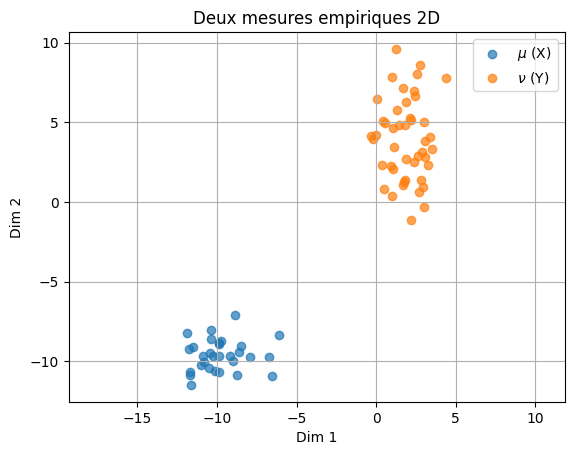

In [2]:
n = 30
m = 45

mean_x = [-10, -10]
cov_x = [[5, 0.5], [0.5, 2]]
x = np.random.multivariate_normal(mean_x,cov_x,size=n)
#print(type(x))
#print(x.shape[0])
#print(x.shape[1])

mean_y = [2, 4]
cov_y = [[1, 0.2], [0.2, 7]]
y = np.random.multivariate_normal(mean_y,cov_y,size=m)
#print(type(y))
#print(y.shape[0])
#print(y.shape[1])

a = np.ones(n) / n
b = np.ones(m) / m
print(a.sum(), b.sum()) # la somme des masses vaut bien 1

plt.figure()
plt.scatter(x[:, 0], x[:, 1], label=r'$\mu$ (X)', alpha=0.7)
plt.scatter(y[:, 0], y[:, 1], label=r'$\nu$ (Y)', alpha=0.7)

plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.title('Deux mesures empiriques 2D')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

##### Exercice 2

**Exercice :** Créer une fonction `cost` qui prend en entrée deux arrays `x`et `y` et renvoie la matrice de coût $(C_{ij})_{i=1,\ldots,n;\ j=1,\ldots,m}$ où  $C_{ij} = \Vert x_i-y_j \Vert^2$

**Attention :** Cette fonction doit être codée pour des nuages de points $x$ et $y$ dans un espace de dimension $d$ quelconque (dans l'exemple ci-dessus $d=2$; dans les applications de transfert de couleur, $d=3$ : c'est l'espace RGB).

**Remarque :** Essayer autant que possible de ne pas faire de boucle! Si vous faites une boucle, la faire sur la dimension $d$ (car en pratique, $d$ sera beaucoup plus petit que $n$ ou $m$)

In [3]:
#version prof
def cost(x,y):
    nx, dx = np.shape(x) # x contient nx points dans R^(dx)
    ny, dy = np.shape(y) # y contient ny points dans R^(dy)
    C = np.zeros((nx,ny)) # matrice de coût

    for i in range(dx):
        # pour une coordonnée i fixée
        # x[:,i] : les nx valeurs de de la coord i des points x
        # y[:,i] : les ny valeurs de de la coord i des points y

        u,v = np.meshgrid(x[:,i],y[:,i])
        # u : matrice de dim (ny,nx) où chaque ligne est une copie de x[:,i]
        # v : matrice de dim (ny,nx) où chaque ligne est une copie de y[:,i]
        # u-v : toutes les différences entre x[:,i] et y[:,i]

        C += ((u-v).T)**2 # on somme les matrices de coûts partielles pour la coord i

    C = C / np.max(C) # on normalise pour que le max de C soit 1 -> evite d'avoir des 0 partout dans exp(-C/eps)

    print("Max value in C :", np.max(C))
    #print("C : ", np.sum(C))
    return C

##### Exercice 3

**Exercice :** Implémenter l'algorithme de Sinkhorn dans une fonction `OT_plan` pour le calcul d'un plan de transport optimal dans le problème d'optimisation $OT_{\varepsilon}(\mu,\nu)$. Pour rappel, l'algorithme prend en entrées :
- les vecteurs de poids $a$ et $b$
- la matrice de coût $C$
- le paramètre de régularisation $\varepsilon$
- les initialisations $\alpha_0$ et $\beta_0$
- le nombre d'itérations $n_{\text{iter}}$

Voici ensuite le déroulé de l'algorithme :
- initialiser les variables $u_0=\exp(\alpha_0)$ et $v_0=\exp(\beta_0)$
- initialiser $K = \exp\left(-\frac{C}{\varepsilon}\right)$
- pour $k=1$ à $k=n_{\text{iter}}$, updater :
\begin{align}
u_{k+1} &\longleftarrow \frac{a}{Kv_k}\\
v_{k+1} &\longleftarrow \frac{b}{K^\top u_{k+1}}
\end{align}
- renvoyer en sortie le plan de transport optimal P, qui doit être une matrice de taille `(n,m)`, telle que $P_{ij} = u_i^{n_{\text{iter}}}K_{ij}v_j^{n_{\text{iter}}}$ pour $i=1,\ldots,n$ et $j=1,\ldots,m$; où $u^{n_{\text{iter}}}$ et $v^{n_{\text{iter}}}$ sont les derniers itérés de l'algorithme. Matriciellement, cela s'écrit $P = \text{diag}(u^{n_{\text{iter}}})K\text{diag}(v^{n_{\text{iter}}})$.

**Remarque :** $Kv_k$ est une produit matriciel. La division $\frac{a}{Kv_k}$ est terme à terme.

In [4]:
def OT_plan(a,b,C,eps,alpha,beta,n_iter):
    # initialisations
    u = np.exp(alpha)
    v = np.exp(beta)
    K = np.exp(-C/eps)
    
    #print("Shape C :",C.shape[0],C.shape[1])
    #print("Shape K :",K.shape[0],K.shape[1])
    
    for k in range(n_iter):
        u = a / (K @ v) # etape pour imposer (P 1_m = a)
        v = b / (np.transpose(K) @ u) # etape pour imposer (P^T 1_n = b)

    P = np.diag(u) @ K @ np.diag(v) # construction du plan de transport optimal

    #print(np.linalg.norm(P.sum(axis=1)-a)) # verif proche de 0
    #print(np.linalg.norm(P.sum(axis=0)-b)) # verif proche de 0

    OT_eps = np.sum(C * P) + eps * np.sum(P * (np.log(P) - 1.0))
    
    return OT_eps, P, u, v

##### Exercice 4

**Exercice :** Calculer le plan optimal entre $\mu$ et $\nu$, ainsi que la valeur de $OT_{\varepsilon}(\mu,\nu)$ pour $\varepsilon = 0.01$. Afficher le plan de transport via `plt.imshow`.

**Remarques importantes :**
- Initialiser les vecteurs $\alpha_0$ et $\beta_0$ à un vecteur de $1$ et choisir $200$ itérations pour l'algorithme.
- En pratique, la matrice de coût $C$ doit être renormalisée afin que sa valeur maximale soit 1. En effet, si les valeurs $C_{ij}$ sont trop grandes, $K_{ij}=\exp\left(-\frac{C_{ij}}{\varepsilon}\right)$ renverra le $0$ machine. Cette renormalisation ne change rien au problème d'optimisation, **le voyez-vous**?

Max value in C : 1.0
norm(P1-a) = 3.179800655392251e-17
norm(P^T1-b) = 2.6649327702454206e-17


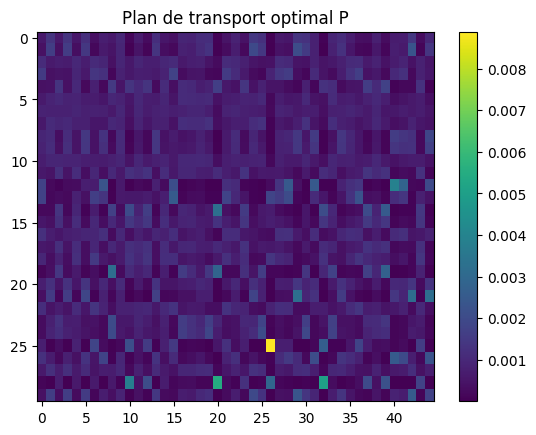

In [5]:
alpha_0 = np.ones(n)
beta_0 = np.ones(m)
C = cost(x,y)

OT_eps, P, u_niter, v_niter = OT_plan(a,b,C,0.01,alpha_0,beta_0,200)
print("norm(P1-a) =", np.linalg.norm(P.sum(axis=1)-a)) #doit etre quasi nul
print("norm(P^T1-b) =", np.linalg.norm(P.sum(axis=0)-b)) # doit etre quasi nul

plt.figure()
plt.imshow(P,aspect='auto')
plt.colorbar()
plt.title('Plan de transport optimal P')
plt.show()

In [6]:
eps = 0.01
cost_term = np.sum(C * P)
entropy_term = np.sum(P * (np.log(P) - 1.0))
print(cost_term, eps * entropy_term)
print("OT_eps :", OT_eps)

0.520437906866373 -0.07929136567666342
OT_eps : 0.44114654118970964


##### Exercice 5

Avec la fonction suivante, vous pouvez voir le déplacement de masse de $\mu$ vers $\nu$ selon le plan de transport optimal obtenu via l'algorithme de Sinkhorn.

In [7]:
def mass_displacement(x, y, a, b, plan):
    n = np.shape(x)[0]
    m = np.shape(y)[0]
    max_plan = np.max(plan)
    plt.scatter(x[:,0], x[:,1], color = 'blue', label = r'$\mu$')
    plt.scatter(y[:,0], y[:,1], color = 'red', label = r'$\nu$')
    for i in range(n):
        for j in range(m):
            if plan[i, j] > 1e-3: #seuil, à 5e-3 on observe seulement qlq déplacements dominants
                plt.plot([x[i, 0], y[j, 0]], [x[i, 1], y[j, 1]], alpha = (plan[i, j]/max_plan), color = 'green')
    plt.legend()

**Exercice :** Afficher le déplacement de masse associé au plan de transport optimal entre $\mu$ et $\nu$.

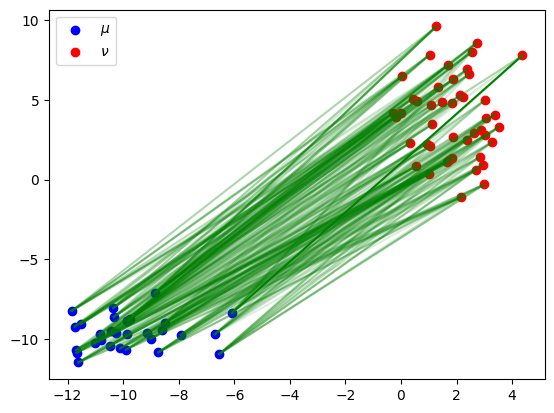

In [8]:
mass_displacement(x,y,a,b,P)

##### Exercice 6

**Exercice :** Vérifier que les conditions aux marginales sont bien respectées; i.e. $\pi\in U(a,b)$.

In [9]:
print(np.sum(a)) # = 1
print(np.sum(b)) # = 1

somme_lignes = 0
for i in range(n):
    somme_lignes += np.sum(P[i,:])


somme_cols = 0
for j in range(m):
    somme_cols += np.sum(P[:,j])

print(somme_lignes) # = 1
print(somme_cols) # = 1
print(np.sum(P))


1.0
1.0000000000000002
0.9999999999999998
1.0000000000000004
1.0


##### Exercice 7

**Exercice :** Créer une fonction `maps`, qui prend en entrée un plan de transport `pi`, les variables `x, y, a, b` et une méthode de mapping (soit `mean`, soit `max`), et renvoie le vecteur mapping `(T(x_1),...,T(x_n))` associé. Pour rappel:
1. méthode `mean` : $$T(x_i) = \sum_{j=1}^m\frac{\pi^*_{ij}y_j}{a_i},$$
1. méthode `max` : $$T(x_i) = y_{j^*}, \quad \text{où} \quad j^* = \underset{j = 1,\ldots,m}{\text{argmax}}\ \pi^*_{ij}$$

Afficher ensuite mesures $\mu$ et $\nu$ sous forme de nuage de point (cf premier exercice), ainsi que les maps `mean` et `max` obtenues à partir du plan de transport optimal.

In [10]:
def maps(pi, x, y, a, b, mapping="mean"):
    n = x.shape[0]
    Tx = np.zeros_like(x)

    if mapping == "mean":
        Tx = (pi @ y) / a[:, None]

    elif mapping == "max":
        j_star = np.argmax(pi,axis=1)
        Tx = y[j_star]

    return Tx

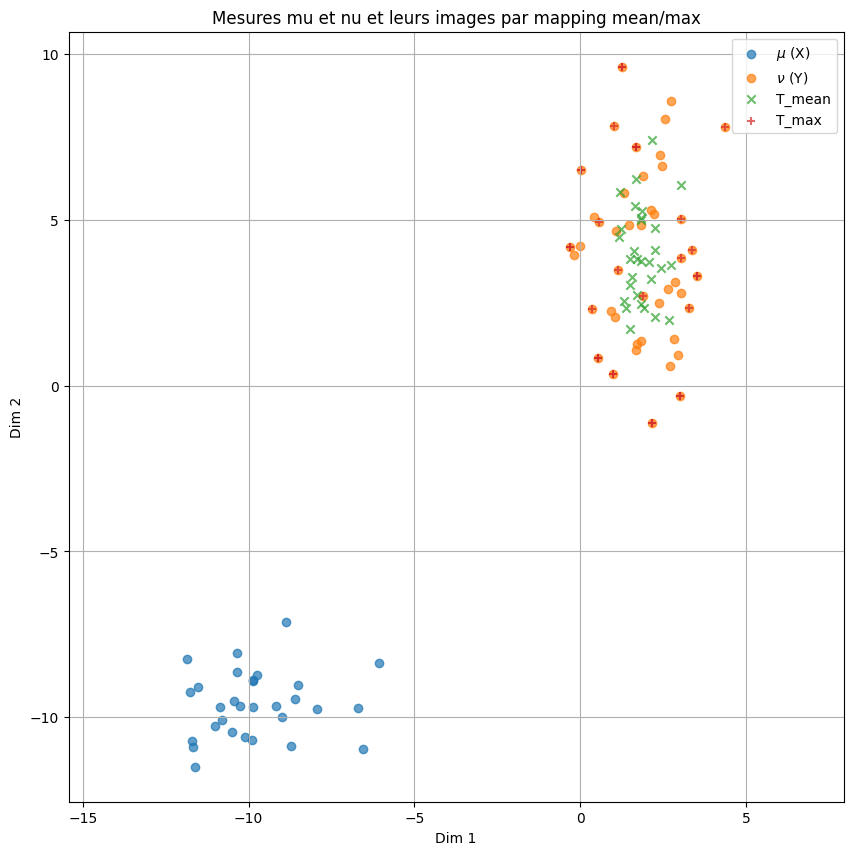

In [11]:
ot_eps, pi_star, u_niter, v_niter = OT_plan(a,b,C,0.01,alpha_0,beta_0,200)
T_mean = maps(pi_star,x,y,a,b,mapping="mean")
T_max = maps(pi_star,x,y,a,b,mapping="max")

plt.figure(figsize=(10,10))
plt.scatter(x[:, 0], x[:, 1], label=r'$\mu$ (X)', alpha=0.7)
plt.scatter(y[:, 0], y[:, 1], label=r'$\nu$ (Y)', alpha=0.7)
plt.scatter(T_mean[:, 0], T_mean[:, 1], label=r'T_mean', alpha=0.7, marker='x')
plt.scatter(T_max[:, 0], T_max[:, 1], label=r'T_max', alpha=0.7, marker='+')

plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.title('Mesures mu et nu et leurs images par mapping mean/max')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

## Transfert de couleur

Nous allons effectuer le transfert de couleur entre les histogrammes de couleur de deux images. En premier lieu, nous aurons besoin des fonctions suivantes pour considérer des images comme des matrices.

In [12]:
def im2mat(img):
    'Convertir une image en une matrice (un pixel par ligne)'
    return img.reshape((img.shape[0] * img.shape[1], img.shape[2])) # chaque ligne est un pixel [R,G,B]


def mat2im(X, shape):
    'Convertir une matrix en une image'
    return X.reshape(shape)


def minmax(img):
    return np.clip(img, 0, 1)

Dans la suite, nous chargeons deux images : un perroquet et une fleur.

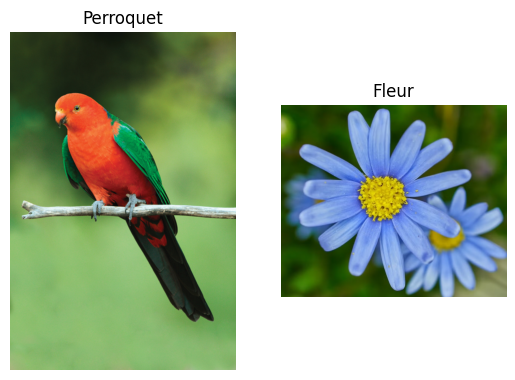

In [13]:
I1 = plt.imread('parrot.jpg').astype(np.float64) / 256
I2 = plt.imread('flower.jpg').astype(np.float64) / 256

Z1 = im2mat(I1) # (N_1 = 240,000 pixels, 3)
Z2 = im2mat(I2) # (N_2 = 305,400 pixels, 3)

plt.subplot(1, 2, 1)
plt.imshow(I1)
plt.axis('off')
plt.title('Perroquet')

plt.subplot(1, 2, 2)
plt.imshow(I2)
plt.axis('off')
plt.title('Fleur')
plt.show()

Nous affichons ci-après les histogrammes de couleur de nos deux images.

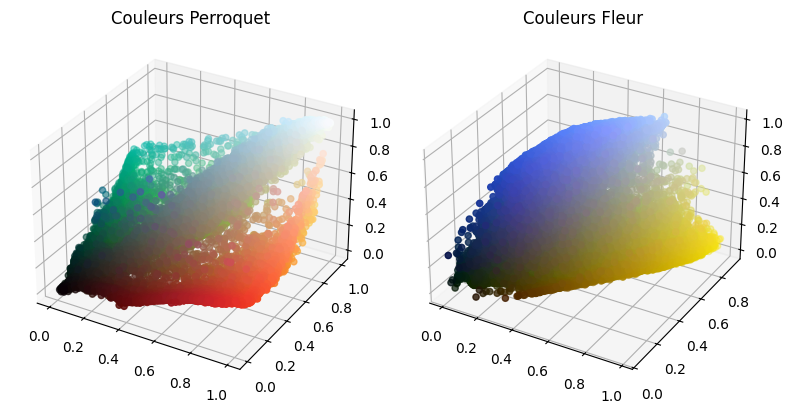

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter3D(Z1[:, 0], Z1[:, 1], Z1[:, 2], color=Z1)
ax1.set_title('Couleurs Perroquet')

ax2 = fig.add_subplot(1, 2, 2, projection='3d') 
ax2.scatter3D(Z2[:, 0], Z2[:, 1], Z2[:, 2], color=Z2)
ax2.set_title('Couleurs Fleur')

plt.tight_layout()
plt.show()

##### Exercice 8

**Exercice :** Afficher la taille des histogrammes.

In [15]:
# couleur peroquet
print(Z1.shape[0],Z1.shape[1])

# couleur fleur
print(Z2.shape[0],Z2.shape[1])

240000 3
305400 3


##### Exercice 9

**Rappel important :** Le calcul d'un plan de transport optimal entre ces deux nuages de points est beaucoup trop coûteux. En effet, même en utilisant l'algorithme de Sinkhorn, il est de l'ordre de $\mathcal{O}(nm)$.

**Exercice :** Afin de pouvoir calculer le transport entre les histogrammes de couleur, nous allons travailler sur des images de plus petite résolution.
- Charger les images 'parrot_small.jpg' et 'flower_small.jpg'.
- Les afficher ainsi que leur histogramme de couleur. Afficher leur taille.

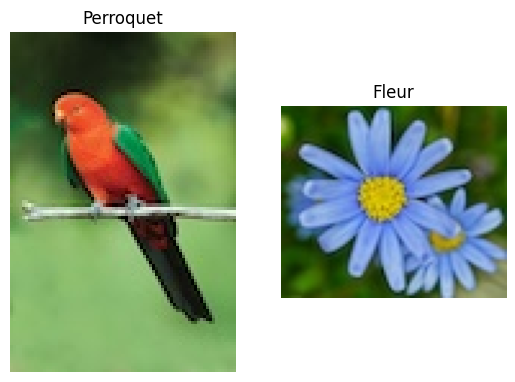

In [16]:
I1_small = plt.imread('parrot_small.jpg').astype(np.float64) / 256
I2_small = plt.imread('flower_small.jpg').astype(np.float64) / 256

Z1_small = im2mat(I1_small)
Z2_small = im2mat(I2_small)

plt.subplot(1, 2, 1)
plt.imshow(I1_small)
plt.axis('off')
plt.title('Perroquet')

plt.subplot(1, 2, 2)
plt.imshow(I2_small)
plt.axis('off')
plt.title('Fleur')
plt.show()

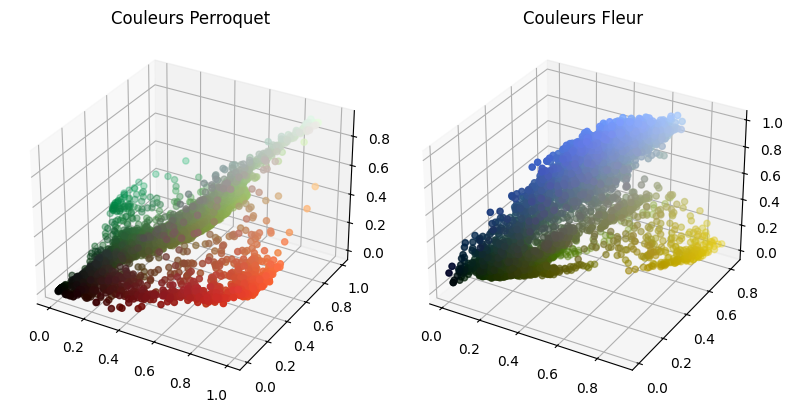

In [17]:
fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter3D(Z1_small[:, 0], Z1_small[:, 1], Z1_small[:, 2], color=Z1_small)
ax1.set_title('Couleurs Perroquet')

ax2 = fig.add_subplot(1, 2, 2, projection='3d') 
ax2.scatter3D(Z2_small[:, 0], Z2_small[:, 1], Z2_small[:, 2], color=Z2_small)
ax2.set_title('Couleurs Fleur')

plt.tight_layout()
plt.show()

In [18]:
# couleur peroquet
print(Z1_small.shape[0],Z1_small.shape[1])

# couleur fleur
print(Z2_small.shape[0],Z2_small.shape[1])

8475 3
6600 3


In [19]:
print("I1_small shape:", I1_small.shape, "=> N =", I1_small.shape[0]*I1_small.shape[1])
print("Z1_small:", Z1_small.shape)

print("I2_small shape:", I2_small.shape, "=> N =", I2_small.shape[0]*I2_small.shape[1])
print("Z2_small:", Z2_small.shape)

I1_small shape: (113, 75, 3) => N = 8475
Z1_small: (8475, 3)
I2_small shape: (75, 88, 3) => N = 6600
Z2_small: (6600, 3)


##### Exercice 10

**Exercice :**
- Calculer le plan de transport optimal entre ces histogrammes.
- Transporter la couleur de la fleur sur le perroquet via la fonction $T$ produite par `maps`: pour cela, associer à chaque pixel $x_i$ du perroquet la couleur $T(x_i)$.
- Afficher les images correspondantes.
- Vous pouvez tester les deux méthodes de `maps`.
- Faire de même en transportant la couleur du perroquet sur la fleur.

n = 8475 N1 = 8475
m = 6600 N2 = 6600
Max value in C : 1.0


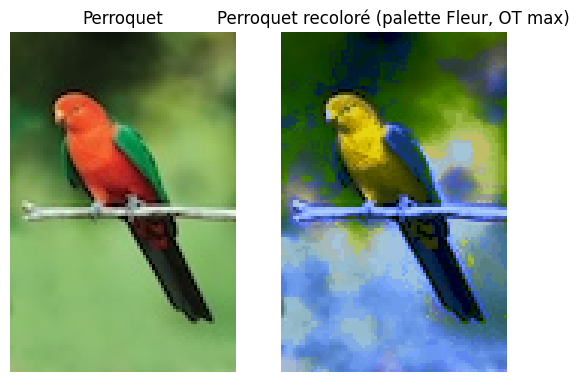

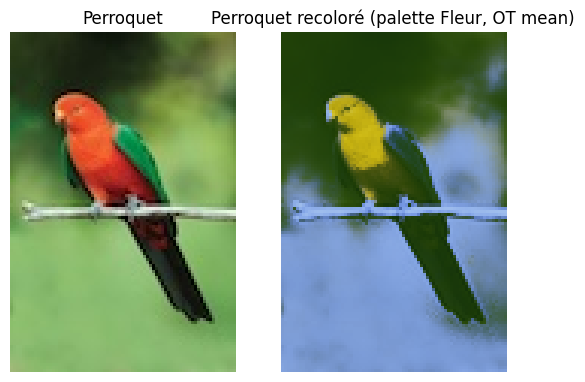

In [20]:
# n = nb pixels perroquet, m = nb pixels fleur
n = Z1_small.shape[0]
m = Z2_small.shape[0]

print("n =", n, "N1 =", I1_small.shape[0]*I1_small.shape[1])
print("m =", m, "N2 =", I2_small.shape[0]*I2_small.shape[1])

a = np.ones(n) / n
b = np.ones(m) / m
alpha_0 = np.ones(n)
beta_0 = np.ones(m)

C = cost(Z1_small, Z2_small)

# Plan OT entre couleurs du perroquet (source) et de la fleur (cible)
ot_eps, pi_perroquet_fleur, u_iter, v_iter = OT_plan(a, b, C, 0.01, alpha_0, beta_0, 200)

# Couleur de la fleur sur le perroquet (OT, max)
T_max_fleur_perroquet = maps(pi_perroquet_fleur, Z1_small, Z2_small, a, b, mapping="max")
perroquet_recolore = minmax(mat2im(T_max_fleur_perroquet, I1_small.shape))

plt.subplot(1,2,1)
plt.imshow(I1_small)
plt.axis('off')
plt.title("Perroquet")

plt.subplot(1,2,2)
plt.imshow(perroquet_recolore)
plt.axis('off')
plt.title("Perroquet recoloré (palette Fleur, OT max)")
plt.show()

# Couleur de la fleur sur le perroquet (OT, mean)
T_mean_fleur_perroquet = maps(pi_perroquet_fleur, Z1_small, Z2_small, a, b, mapping="mean")
perroquet_recolore = minmax(mat2im(T_mean_fleur_perroquet, I1_small.shape))

plt.subplot(1,2,1)
plt.imshow(I1_small)
plt.axis('off')
plt.title("Perroquet")

plt.subplot(1,2,2)
plt.imshow(perroquet_recolore)
plt.axis('off')
plt.title("Perroquet recoloré (palette Fleur, OT mean)")
plt.show()


**Deux défauts apparaissent dans cette méthode:**
1. la méthode n'est pas applicable sur de grandes images
1. il y a des problèmes dans la répartition des couleurs : c'est logique car il n'y a pas les mêmes proportions de couleurs entre deux images!

Pour contourner le problème (1.), nous allons effectuer les étapes suivantes :

- On considère les images en haute résolution `I1`et `I2`.
- Effectuer un K-means (K = 1000) sur les nuages de points dans RGB des images `I1`et `I2`. Nous obtenons deux nuages de points `Z1_K` et`Z2_K` de dimension `(K,3)` qui représentent les centres des clusters obtenus par K-means.
- Afficher les nuages de points de couleur de `Z1_K` et`Z2_K`.
- Calculer le plan de transport optimal entre ces deux nouveaux nuages de points `Z1_K` et`Z2_K`.
- Calculer la map de transport associée $T$ via `maps` du perroquet vers la fleur.
- Afin d'obtenir un transfert de couleur entre les nuages de points `Z1` et `Z2`, utiliser la méthode d'interpolation du plus proche voisin; autrement dit tous les points de `Z1` appartenant au cluster $C_i^k$ de centre $x_i^k$ de `Z1_K` (où $k=1,\ldots,K$) sont envoyés sur la couleur $T(x_i^k)$.


##### Exercice 11

**Exercice :** Appliquer la méthode décrite ci-dessus.

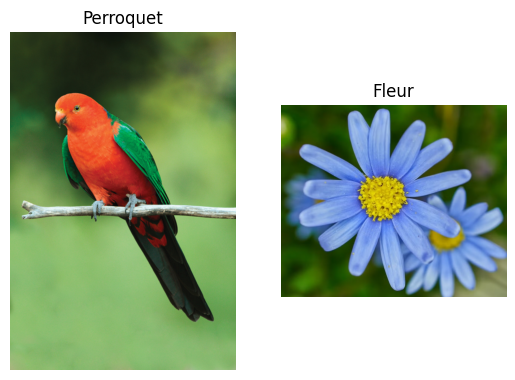

In [21]:
I1 = plt.imread('parrot.jpg').astype(np.float64) / 256
I2 = plt.imread('flower.jpg').astype(np.float64) / 256

Z1 = im2mat(I1)
Z2 = im2mat(I2)

plt.subplot(1, 2, 1)
plt.imshow(I1)
plt.axis('off')
plt.title('Perroquet')

plt.subplot(1, 2, 2)
plt.imshow(I2)
plt.axis('off')
plt.title('Fleur')
plt.show()

In [22]:
from sklearn.cluster import KMeans

# K-means sur les nuages RGB
K = 1000
kmeans1 = KMeans(n_clusters=K, random_state=0, n_init="auto").fit(Z1)
kmeans2 = KMeans(n_clusters=K, random_state=0, n_init="auto").fit(Z2)

Z1_K = kmeans1.cluster_centers_
Z2_K = kmeans2.cluster_centers_
labels_Z1 = kmeans1.labels_  # shape: (H*W,)
labels_Z2 = kmeans2.labels_  # shape: (H*W,)

In [23]:
# Poids = proportion de pixels dans chaque cluster
N1 = Z1.shape[0]
N2 = Z2.shape[0]

counts1 = np.bincount(labels_Z1, minlength=K)
counts2 = np.bincount(labels_Z2, minlength=K)


a = counts1 / N1
b = counts2 / N2

# OT entre les centres (K x K)
alpha_0 = np.ones(K)
beta_0 = np.ones(K)

C = cost(Z1_K, Z2_K)
ot_eps_kmeans, pi_k, u_iter, v_iter = OT_plan(a, b, C, 0.01, alpha_0, beta_0, 200)

# Mapping 
T_K_mean = maps(pi_k, Z1_K, Z2_K, a, b, mapping="mean")
T_K_max = maps(pi_k, Z1_K, Z2_K, a, b, mapping="max")

# Interpolation "plus proche voisins"
# chaque pixel Z1 herite de la couleur transportée de son centre
Z1_to_flower_mean = T_K_mean[labels_Z1]
Z1_to_flower_max = T_K_max[labels_Z1]

I1_to_flower_mean = minmax(mat2im(Z1_to_flower_mean, I1.shape))
I1_to_flower_max = minmax(mat2im(Z1_to_flower_max, I1.shape))

Max value in C : 1.0


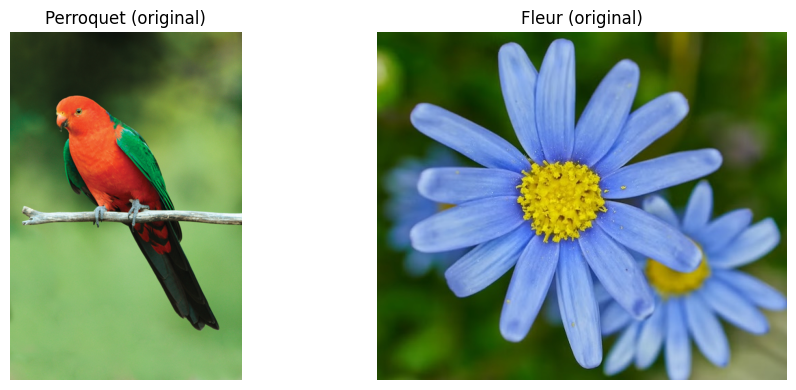

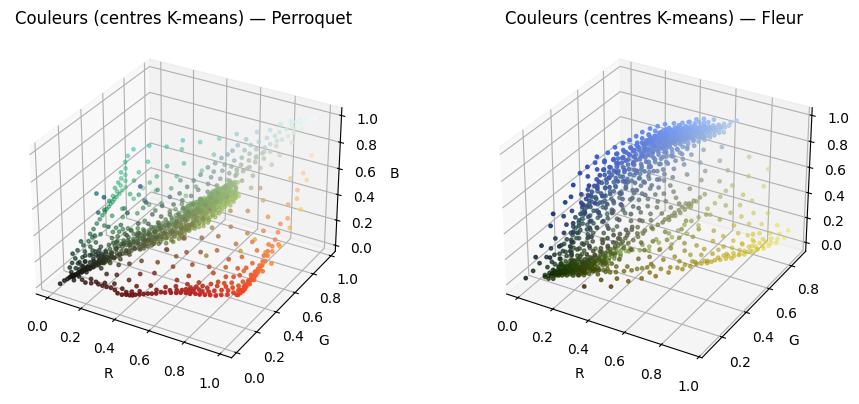

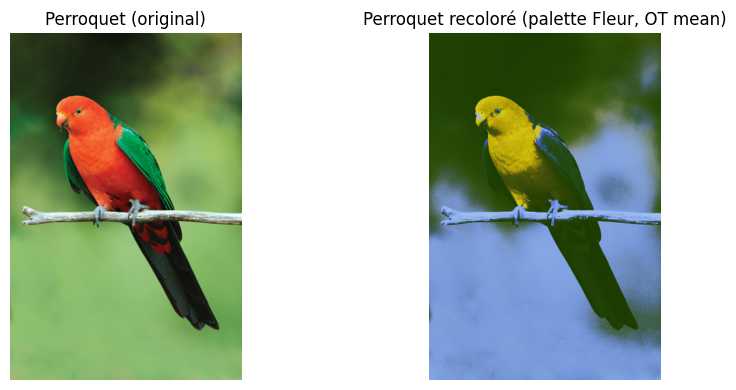

In [24]:
# images
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(I1)
plt.axis("off")
plt.title("Perroquet (original)")

plt.subplot(1, 2, 2)
plt.imshow(I2)
plt.axis("off")
plt.title("Fleur (original)")

plt.tight_layout()
plt.show()

#  Nuages de points RGB des centres K-means
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.scatter3D(Z1_K[:, 0], Z1_K[:, 1], Z1_K[:, 2], color=Z1_K, s=6)
ax1.set_title("Couleurs (centres K-means) — Perroquet")
ax1.set_xlabel("R"); ax1.set_ylabel("G"); ax1.set_zlabel("B")

ax2 = fig.add_subplot(1, 2, 2, projection="3d")
ax2.scatter3D(Z2_K[:, 0], Z2_K[:, 1], Z2_K[:, 2], color=Z2_K, s=6)
ax2.set_title("Couleurs (centres K-means) — Fleur")
ax2.set_xlabel("R"); ax2.set_ylabel("G"); ax2.set_zlabel("B")

plt.tight_layout()
plt.show()

# Résultats transfert de couleur 
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(I1)
plt.axis("off")
plt.title("Perroquet (original)")

plt.subplot(1, 2, 2)
plt.imshow(I1_to_flower_mean)  
plt.axis("off")
plt.title("Perroquet recoloré (palette Fleur, OT mean)") 

plt.tight_layout()
plt.show()


## Exercice supplémentaire : prise en main (rapide) de la toolbox POT

Nous allons à présent utiliser la toolbox POT, une librairie Python qui résoud des problèmes de transport optimal via différent solveur d'optimisation numérique.
En premier lieu, installer la librairie via ce lien : https://pythonot.github.io/index.html, puis l'appeler dans votre script avec `import ot`.

**Exercice :** Comparer en norme 1 les résultats de
- votre fonction `cost` à celle de POT `ot.dist` sur les données simulées du début de TP.
- votre fonction `OT_plan` à celle de POT `ot.sinkhorn` sur les données simulées du début de TP.

Regarder également comment sont codées ces fonctions POT !

**Exercice :** Comparer les sorties des fonctions `ot.sinkhorn` et `ot.emd`.  `ot.emd` calcule le transport optimal sans régularisation, c'est-à-dire:
$$OT(\mu,\nu) = \underset{\pi\in U(\mu,\nu)}{\text{min}} \ \sum_{i=1}^n\sum_{j=1}^m C_{ij}\pi_{ij}$$

## Exercice supplémentaire : transfert de couleur via la toolbox POT

Afin de contourner le problème (2.) de répartition de couleurs dans une image, [1] a proposé une régularisation sur les gradients des images (qui interviennent dans les marginales du plan de transport optimal)

[1] Ferradans, S., Papadakis, N., Peyre, G., & Aujol, J. F. (2014). Regularized discrete optimal transport. SIAM Journal on Imaging Sciences, 7(3), 1853-1882.

**Exercice :** Faire un transfert de couleur avec la librairie POT en vous inspirant de l'exemple dans https://pythonot.github.io/auto_examples/domain-adaptation/plot_otda_color_images.html#sphx-glr-auto-examples-domain-adaptation-plot-otda-color-images-py, mais en utilisant la classe `ot.da.EMDLaplaceTransport` et l'option `disp` pour le type de régularisation.